<a href="https://colab.research.google.com/github/NoobCoder-dweeb/client-puzzle/blob/main/Client_Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(np.__version__)
print(scipy.__version__)
print(matplotlib.__version__)
print(sns.__version__)

2.0.2
1.16.3
3.10.0
0.13.2


In [19]:
from typing import Tuple
import numpy as np

def create_population(m: int, k:int) -> Tuple[np.array, np.array]:
  n = 2**k
  seq = np.arange(1, n+1).reshape(1, -1)

  base = np.ones(n, dtype=int)
  counts = base
  # Convolve m times to simulate total hashes for m sub-puzzles
  for _ in range(m-1):
    # counts = np.convolve(counts, base)
    counts = scipy.signal.fftconvolve(counts, base)

  # Pad the counts array with m-1 zeros at the beginning
  padded_counts = np.pad(counts, (m-1, 0), 'constant', constant_values=0)

  # Create values array starting from 1
  values = np.arange(1, m*n+1)

  return values, padded_counts

In [20]:
create_population(1,5)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [21]:
create_population(2,4)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,  7.,
         6.,  5.,  4.,  3.,  2.,  1.]))

In [22]:
def generate_hist(X:np.array, y:np.array, color:str, title:str) -> None:
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.barplot(x=X, y=y, color=color)

  plt.suptitle(f"Case for Puzzle {title}")
  plt.xlabel("# of Hashes")
  plt.ylabel("Counts")
  plt.xticks(np.arange(0, max(X)+1, 1))
  plt.box(True)  # Add border around the plot
  plt.tight_layout()
  plt.savefig(f"case_{title}.png")
  plt.show()

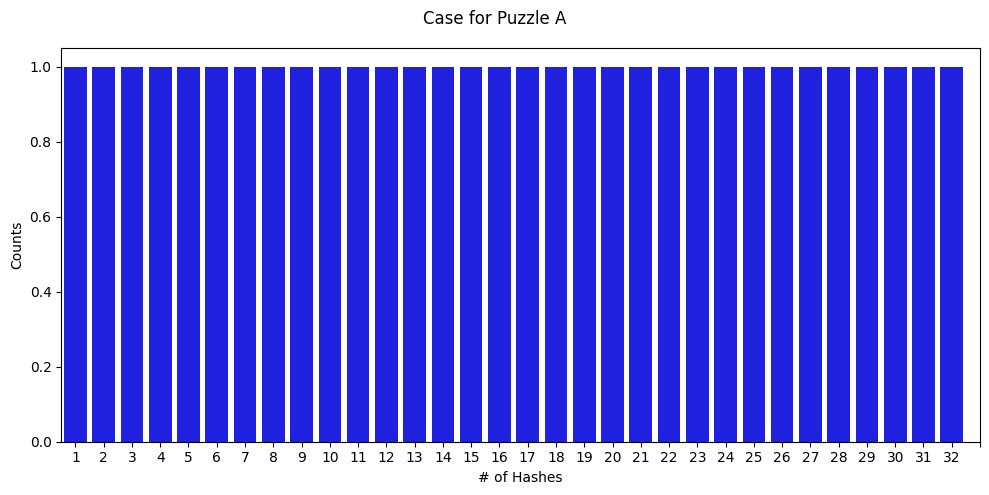

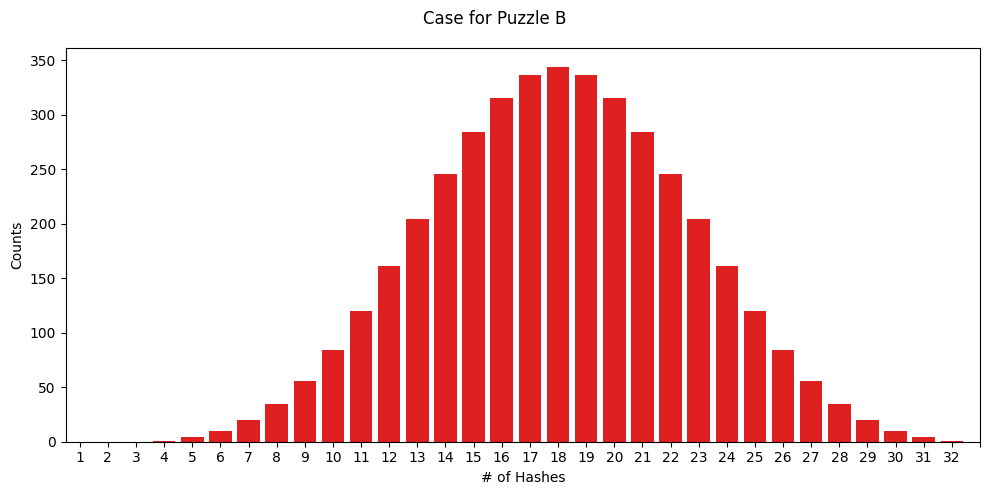

In [23]:
import pandas as pd
configs = [("A", 1,5,"blue"), ("B", 4,3,"red")]

for title, m, k, color in configs:
  values, counts = create_population(m,k)
  df = pd.DataFrame({"Values": values, "Counts":counts})
  df.to_csv(f"case_{title}.csv", index=False)
  generate_hist(values, counts, color, title)